<a href="https://colab.research.google.com/github/mozey256/TGR5/blob/main/ML_Part_2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Novel Small Molecules as Potential TGR5/GLP1 Agonists in Type 2 Diabetes Treatment [Part 2] Exploratory Data Analysis**

Ainembabazi Moses

[*'@mozey256' github*](https://github.com/mozey256/TGR5)



In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-02-20 15:18:13--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   133MB/s    in 0.6s    

2024-02-20 15:18:13 (133 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6

## **Load bioactivity data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/bioactivity_preprocessed_data.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [ ]:
!pip install rdkit

     |████████████████████████████████| 29.5 MB 1.3 MB/s 


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,420.634,5.1140,3.0,3.0
1,422.606,3.6947,4.0,4.0
2,406.607,4.7239,3.0,3.0
3,422.606,3.6947,4.0,4.0
4,434.661,5.3600,3.0,3.0
...,...,...,...,...
904,307.393,4.9911,0.0,3.0
905,307.393,4.9927,0.0,3.0
906,321.420,5.2387,0.0,3.0
907,321.420,5.3828,0.0,3.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL566315,CC[C@H]1[C@@H](O)[C@@H]2[C@H](CC[C@]3(C)[C@@H]...,active,755.0
1,CHEMBL388679,C[C@H](C[C@@H](C)[C@H]1CC[C@H]2[C@@H]3[C@H](O)...,inactive,51900.0
2,CHEMBL245001,C[C@H](C[C@@H](C)[C@H]1CC[C@H]2[C@@H]3[C@H](O)...,inactive,25500.0
3,CHEMBL266356,C[C@H](C[C@H](C)C(=O)O)[C@H]1CC[C@H]2[C@@H]3[C...,intermediate,4390.0
4,CHEMBL244785,CC[C@@H]1C2C[C@H](O)CC[C@]2(C)[C@H]2CC[C@]3(C)...,active,95.0
...,...,...,...,...
904,CHEMBL5192002,CCC(C)Oc1cccc(OCc2ccc3ccccc3n2)c1,active,100.0
905,CHEMBL18775,CCCCOc1cccc(OCc2ccc3ccccc3n2)c1,active,500.0
906,CHEMBL5173976,CCC(C)COc1cccc(OCc2ccc3ccccc3n2)c1,active,170.0
907,CHEMBL5172427,CCCCCOc1cccc(OCc2ccc3ccccc3n2)c1,intermediate,1800.0


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL566315,CC[C@H]1[C@@H](O)[C@@H]2[C@H](CC[C@]3(C)[C@@H]...,active,755.0,420.634,5.1140,3.0,3.0
1,CHEMBL388679,C[C@H](C[C@@H](C)[C@H]1CC[C@H]2[C@@H]3[C@H](O)...,inactive,51900.0,422.606,3.6947,4.0,4.0
2,CHEMBL245001,C[C@H](C[C@@H](C)[C@H]1CC[C@H]2[C@@H]3[C@H](O)...,inactive,25500.0,406.607,4.7239,3.0,3.0
3,CHEMBL266356,C[C@H](C[C@H](C)C(=O)O)[C@H]1CC[C@H]2[C@@H]3[C...,intermediate,4390.0,422.606,3.6947,4.0,4.0
4,CHEMBL244785,CC[C@@H]1C2C[C@H](O)CC[C@]2(C)[C@H]2CC[C@]3(C)...,active,95.0,434.661,5.3600,3.0,3.0
...,...,...,...,...,...,...,...,...
904,CHEMBL5192002,CCC(C)Oc1cccc(OCc2ccc3ccccc3n2)c1,active,100.0,307.393,4.9911,0.0,3.0
905,CHEMBL18775,CCCCOc1cccc(OCc2ccc3ccccc3n2)c1,active,500.0,307.393,4.9927,0.0,3.0
906,CHEMBL5173976,CCC(C)COc1cccc(OCc2ccc3ccccc3n2)c1,active,170.0,321.420,5.2387,0.0,3.0
907,CHEMBL5172427,CCCCCOc1cccc(OCc2ccc3ccccc3n2)c1,intermediate,1800.0,321.420,5.3828,0.0,3.0


### **Convert EC50 to pEC50**
To allow **EC50** data to be more uniformly distributed, we will convert **EC50** to the negative logarithmic scale which is essentially **-log10(EC50)**.

This custom function pEC50() will accept a DataFrame as input and will:
* Take the EC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pEC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pEC50(input):
    pEC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pEC50.append(-np.log10(molar))

    input['pEC50'] = pEC50
    x = input.drop('standard_value_norm', 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count       909.000000
mean       8148.727131
std       24036.975102
min           0.057000
25%          60.000000
50%         549.000000
75%        5540.000000
max      378000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-51-c8e03533cbc3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL566315,CC[C@H]1[C@@H](O)[C@@H]2[C@H](CC[C@]3(C)[C@@H]...,active,420.634,5.1140,3.0,3.0,755.0
1,CHEMBL388679,C[C@H](C[C@@H](C)[C@H]1CC[C@H]2[C@@H]3[C@H](O)...,inactive,422.606,3.6947,4.0,4.0,51900.0
2,CHEMBL245001,C[C@H](C[C@@H](C)[C@H]1CC[C@H]2[C@@H]3[C@H](O)...,inactive,406.607,4.7239,3.0,3.0,25500.0
3,CHEMBL266356,C[C@H](C[C@H](C)C(=O)O)[C@H]1CC[C@H]2[C@@H]3[C...,intermediate,422.606,3.6947,4.0,4.0,4390.0
4,CHEMBL244785,CC[C@@H]1C2C[C@H](O)CC[C@]2(C)[C@H]2CC[C@]3(C)...,active,434.661,5.3600,3.0,3.0,95.0
...,...,...,...,...,...,...,...,...
904,CHEMBL5192002,CCC(C)Oc1cccc(OCc2ccc3ccccc3n2)c1,active,307.393,4.9911,0.0,3.0,100.0
905,CHEMBL18775,CCCCOc1cccc(OCc2ccc3ccccc3n2)c1,active,307.393,4.9927,0.0,3.0,500.0
906,CHEMBL5173976,CCC(C)COc1cccc(OCc2ccc3ccccc3n2)c1,active,321.420,5.2387,0.0,3.0,170.0
907,CHEMBL5172427,CCCCCOc1cccc(OCc2ccc3ccccc3n2)c1,intermediate,321.420,5.3828,0.0,3.0,1800.0


In [ ]:
df_norm.standard_value_norm.describe()

count       909.000000
mean       8148.727131
std       24036.975102
min           0.057000
25%          60.000000
50%         549.000000
75%        5540.000000
max      378000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pEC50(df_norm)
df_final

<ipython-input-47-37097b451f86>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pEC50
0,CHEMBL566315,CC[C@H]1[C@@H](O)[C@@H]2[C@H](CC[C@]3(C)[C@@H]...,active,420.634,5.1140,3.0,3.0,6.122053
1,CHEMBL388679,C[C@H](C[C@@H](C)[C@H]1CC[C@H]2[C@@H]3[C@H](O)...,inactive,422.606,3.6947,4.0,4.0,4.284833
2,CHEMBL245001,C[C@H](C[C@@H](C)[C@H]1CC[C@H]2[C@@H]3[C@H](O)...,inactive,406.607,4.7239,3.0,3.0,4.593460
3,CHEMBL266356,C[C@H](C[C@H](C)C(=O)O)[C@H]1CC[C@H]2[C@@H]3[C...,intermediate,422.606,3.6947,4.0,4.0,5.357535
4,CHEMBL244785,CC[C@@H]1C2C[C@H](O)CC[C@]2(C)[C@H]2CC[C@]3(C)...,active,434.661,5.3600,3.0,3.0,7.022276
...,...,...,...,...,...,...,...,...
904,CHEMBL5192002,CCC(C)Oc1cccc(OCc2ccc3ccccc3n2)c1,active,307.393,4.9911,0.0,3.0,7.000000
905,CHEMBL18775,CCCCOc1cccc(OCc2ccc3ccccc3n2)c1,active,307.393,4.9927,0.0,3.0,6.301030
906,CHEMBL5173976,CCC(C)COc1cccc(OCc2ccc3ccccc3n2)c1,active,321.420,5.2387,0.0,3.0,6.769551
907,CHEMBL5172427,CCCCCOc1cccc(OCc2ccc3ccccc3n2)c1,intermediate,321.420,5.3828,0.0,3.0,5.744727


In [ ]:
df_final.pEC50.describe()

count    909.000000
mean       6.310997
std        1.272649
min        3.422508
25%        5.256490
50%        6.260428
75%        7.221849
max       10.244125
Name: pEC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pEC50
0,CHEMBL566315,CC[C@H]1[C@@H](O)[C@@H]2[C@H](CC[C@]3(C)[C@@H]...,active,420.634,5.1140,3.0,3.0,6.122053
1,CHEMBL388679,C[C@H](C[C@@H](C)[C@H]1CC[C@H]2[C@@H]3[C@H](O)...,inactive,422.606,3.6947,4.0,4.0,4.284833
2,CHEMBL245001,C[C@H](C[C@@H](C)[C@H]1CC[C@H]2[C@@H]3[C@H](O)...,inactive,406.607,4.7239,3.0,3.0,4.593460
4,CHEMBL244785,CC[C@@H]1C2C[C@H](O)CC[C@]2(C)[C@H]2CC[C@]3(C)...,active,434.661,5.3600,3.0,3.0,7.022276
5,CHEMBL244784,C[C@H](C[C@H](C)C(=O)O)[C@H]1CC[C@H]2[C@@H]3[C...,active,420.634,4.9699,3.0,3.0,6.853872
...,...,...,...,...,...,...,...,...
903,CHEMBL5189181,CCCOc1cccc(OCc2ccc3ccccc3n2)c1,active,293.366,4.6026,0.0,3.0,6.000000
904,CHEMBL5192002,CCC(C)Oc1cccc(OCc2ccc3ccccc3n2)c1,active,307.393,4.9911,0.0,3.0,7.000000
905,CHEMBL18775,CCCCOc1cccc(OCc2ccc3ccccc3n2)c1,active,307.393,4.9927,0.0,3.0,6.301030
906,CHEMBL5173976,CCC(C)COc1cccc(OCc2ccc3ccccc3n2)c1,active,321.420,5.2387,0.0,3.0,6.769551


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


### **Frequency plot of the 2 bioactivity classes**

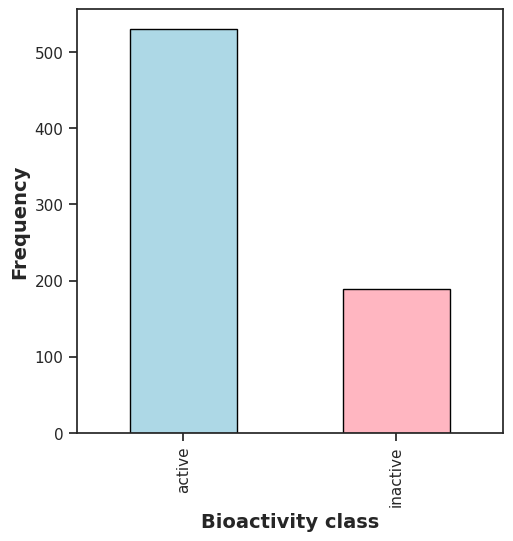

In [ ]:
plt.figure(figsize=(5.5, 5.5))
df_2class.groupby('bioactivity_class').size().plot(kind='bar', color=["lightblue","lightpink"], edgecolor="black")
plt.gca().spines[['top', 'right',]].set_visible(True)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

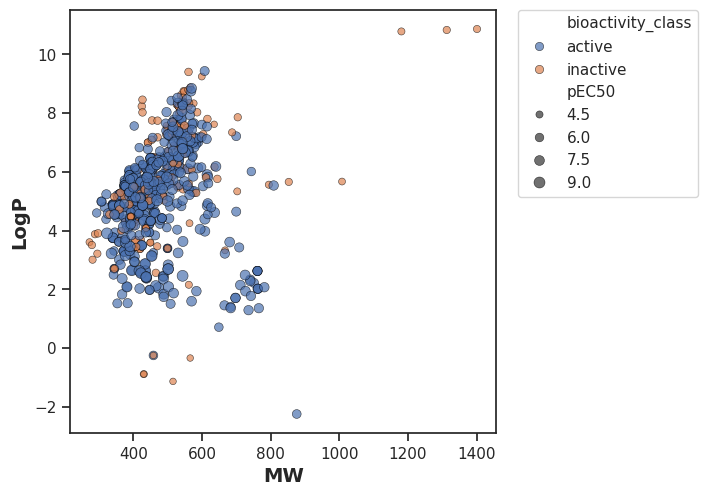

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pEC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pEC50 value**

<ipython-input-60-a7576bedeab3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bioactivity_class', y='pEC50', data=df_2class, palette=custom_palette)


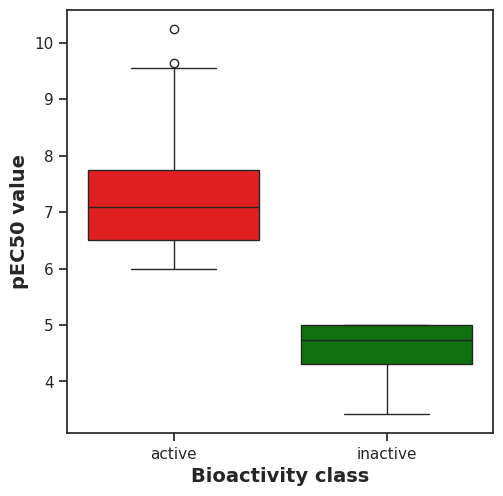

In [ ]:
# Set the palette for the boxplot
custom_palette = ['red', 'green']  # Specify your own list of colors

# Create the boxplot
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='pEC50', data=df_2class, palette=custom_palette)

# Set plot labels
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pEC50 value', fontsize=14, fontweight='bold')

# Save the plot as a PDF file
plt.savefig('plot_ec50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pEC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pEC50,100170.0,7.281833e-93,0.05,Different distribution (reject H0)


#### **MW**

<ipython-input-30-33fc0cd44c48>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bioactivity_class', y='MW', data=df_2class, palette=custom_palette)


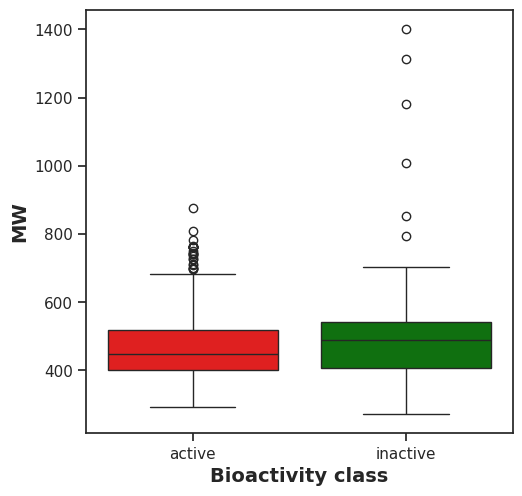

In [ ]:
# Set the palette for the boxplot
custom_palette = ['red', 'green']  # Specify your own list of colors

# Create the boxplot
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='MW', data=df_2class, palette=custom_palette)

# Set plot labels
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

# Save the plot as a PDF file
plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,44041.0,0.013695,0.05,Different distribution (reject H0)


#### **LogP**

<ipython-input-64-f3d98532bc02>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bioactivity_class', y='LogP', data=df_2class, palette=custom_palette)


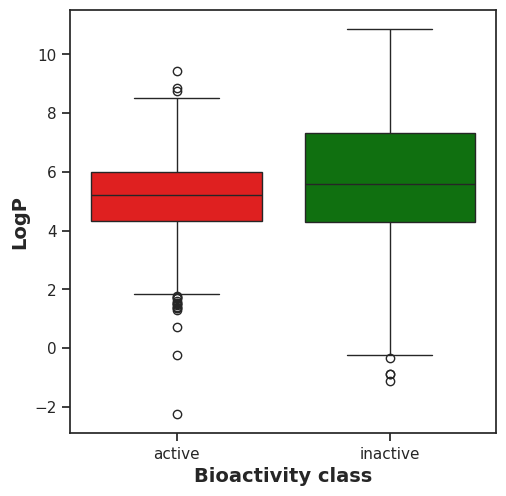

In [ ]:
# Set the palette for the boxplot
custom_palette = ['red', 'green']  # Specify your own list of colors

# Create the boxplot
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='LogP', data=df_2class, palette=custom_palette)

# Set plot labels
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

# Save the plot as a PDF file
plt.savefig('LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,40977.0,0.000203,0.05,Different distribution (reject H0)


#### **NumHDonors**

<ipython-input-66-fbbbb90e18c3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bioactivity_class', y='NumHDonors', data=df_2class, palette=custom_palette)


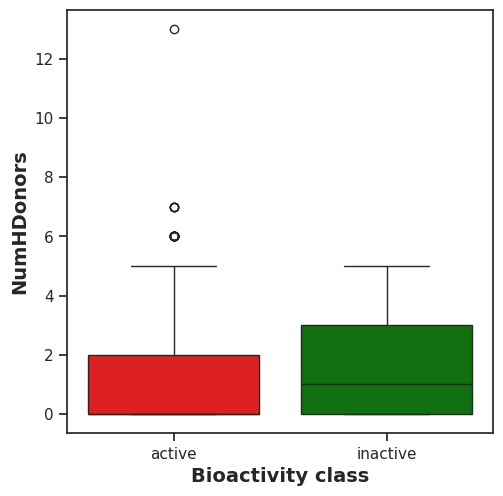

In [ ]:
# Set the palette for the boxplot
custom_palette = ['red', 'green']  # Specify your own list of colors

# Create the boxplot
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='NumHDonors', data=df_2class, palette=custom_palette)

# Set plot labels
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

# Save the plot as a PDF file
plt.savefig('NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,40126.5,0.000017,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

<ipython-input-68-2e38ace7718e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data=df_2class, palette=custom_palette)


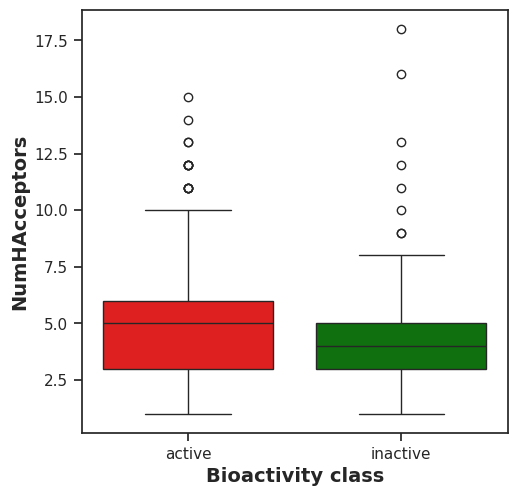

In [ ]:
# Set the palette for the boxplot
custom_palette = ['red', 'green']  # Specify your own list of colors

# Create the boxplot
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data=df_2class, palette=custom_palette)

# Set plot labels
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

# Save the plot as a PDF file
plt.savefig('NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,56090.5,0.012607,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pEC50 values**

Taking a look at pEC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``EC50 < 1,000 nM = Actives while EC50 > 10,000 nM = Inactives``, corresponding to ``pEC50 > 6 = Actives and pEC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

updating: LogP.pdf (deflated 38%)
updating: plot_bioactivity_class.pdf (deflated 38%)
updating: mannwhitneyu_pEC50.csv (deflated 11%)
updating: plot_ec50.pdf (deflated 36%)
updating: plot_MW.pdf (deflated 39%)
updating: mannwhitneyu_LogP.csv (deflated 9%)
updating: mannwhitneyu_MW.csv (deflated 10%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: NumHDonors.pdf (deflated 37%)
updating: mannwhitneyu_NumHDonors.csv (deflated 11%)
updating: plot_MW_vs_LogP.pdf (deflated 4%)
updating: bioactivity_preprocessed_data.csv (deflated 82%)
updating: NumHAcceptors.pdf (deflated 39%)


In [ ]:
df_2class.to_csv('bioactivity_data_3class_pEC50.csv', index=False)

In [ ]:
!ls


bioactivity_data_3class_pEC50.csv  mannwhitneyu_NumHDonors.csv		  plot_ec50.pdf
bioactivity_preprocessed_data.csv  mannwhitneyu_pEC50.csv		  plot_MW.pdf
LogP.pdf			   Miniconda3-py37_4.8.2-Linux-x86_64.sh  plot_MW_vs_LogP.pdf
mannwhitneyu_LogP.csv		   NumHAcceptors.pdf			  results.zip
mannwhitneyu_MW.csv		   NumHDonors.pdf			  sample_data
mannwhitneyu_NumHAcceptors.csv	   plot_bioactivity_class.pdf
